In [69]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import json
from pandas.io.json import json_normalize
import numpy as np
from functools import reduce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from yellowbrick.regressor import PredictionError, ResidualsPlot
from yellowbrick.regressor.alphas import AlphaSelection
import seaborn as sns
sns.set(style="darkgrid")
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import gls

In [51]:
austria = pd.read_csv(r'C:\Users\WZHKLB\Desktop\Personal\Python\Springboard projects\Capstone 1\AT_clean.csv')

In [52]:
austria.describe()

,INFL,DEP,LOA,UNE,GDP,NUM,CAR,T1,NPL,NIM,ROA,ROE,LA,LATA
count,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.00000,40.00000
mean,109.751638,28.675000,27.900000,5.22550,106.622698,42.587500,16.966000,13.453250,2.756000,61.102000,0.276000,4.13100,70.43450,24.74050
std,5.494802,0.729858,3.287895,0.46138,4.620427,3.349584,1.034933,1.418514,0.625836,2.928023,0.223639,3.20757,3.39787,1.07947
min,99.048490,28.000000,24.000000,4.51000,98.140928,38.000000,15.300000,11.360000,1.630000,56.210000,-0.200000,-3.16000,63.93000,22.53000
25%,105.970648,28.000000,25.000000,4.80250,103.492810,39.875000,16.147500,12.332500,2.400000,59.057500,0.127500,1.96000,67.90250,24.15750
50%,110.113449,29.000000,27.000000,5.19500,104.708923,42.000000,16.685000,13.165000,2.725000,60.680000,0.275000,4.31000,69.68000,24.64500
75%,113.907504,29.000000,31.000000,5.65250,110.395567,45.312500,17.990000,14.812500,3.117500,62.427500,0.432500,6.93000,73.01000,25.32500
max,119.054094,30.000000,33.000000,6.03000,115.073540,50.000000,18.840000,15.930000,4.100000,68.360000,0.770000,9.98000,77.00000,27.41000


In [78]:
print(austria)

          Date        INFL   DEP   LOA   UNE         GDP    NUM    CAR     T1  \
0   2010-03-31   99.048490  30.0  33.0  5.20   98.140928  50.00  15.32  11.36   
1   2010-06-30  100.175077  30.0  33.0  5.08   99.765166  49.00  16.49  12.65   
2   2010-09-30  100.053286  29.0  33.0  4.96  100.721266  48.00  15.30  11.44   
3   2010-12-31  100.723147  29.0  33.0  4.84  101.372640  47.00  15.44  11.65   
4   2011-03-31  101.894533  29.0  33.0  4.78  102.847952  46.75  16.00  12.10   
5   2011-06-30  103.494975  29.0  33.0  4.71  103.058174  46.50  15.84  12.03   
6   2011-09-30  103.594999  28.0  32.0  4.64  103.067938  46.25  15.42  11.62   
7   2011-12-31  104.161821  28.0  32.0  4.58  103.236549  46.00  15.83  11.99   
8   2012-03-31  104.528587  28.0  32.0  4.65  104.139397  45.75  16.52  12.67   
9   2012-06-30  105.795600  28.0  31.0  4.73  103.466403  45.50  16.45  12.60   
10  2012-09-30  106.028997  28.0  31.0  4.81  103.582388  45.25  16.05  12.46   
11  2012-12-31  107.062613  

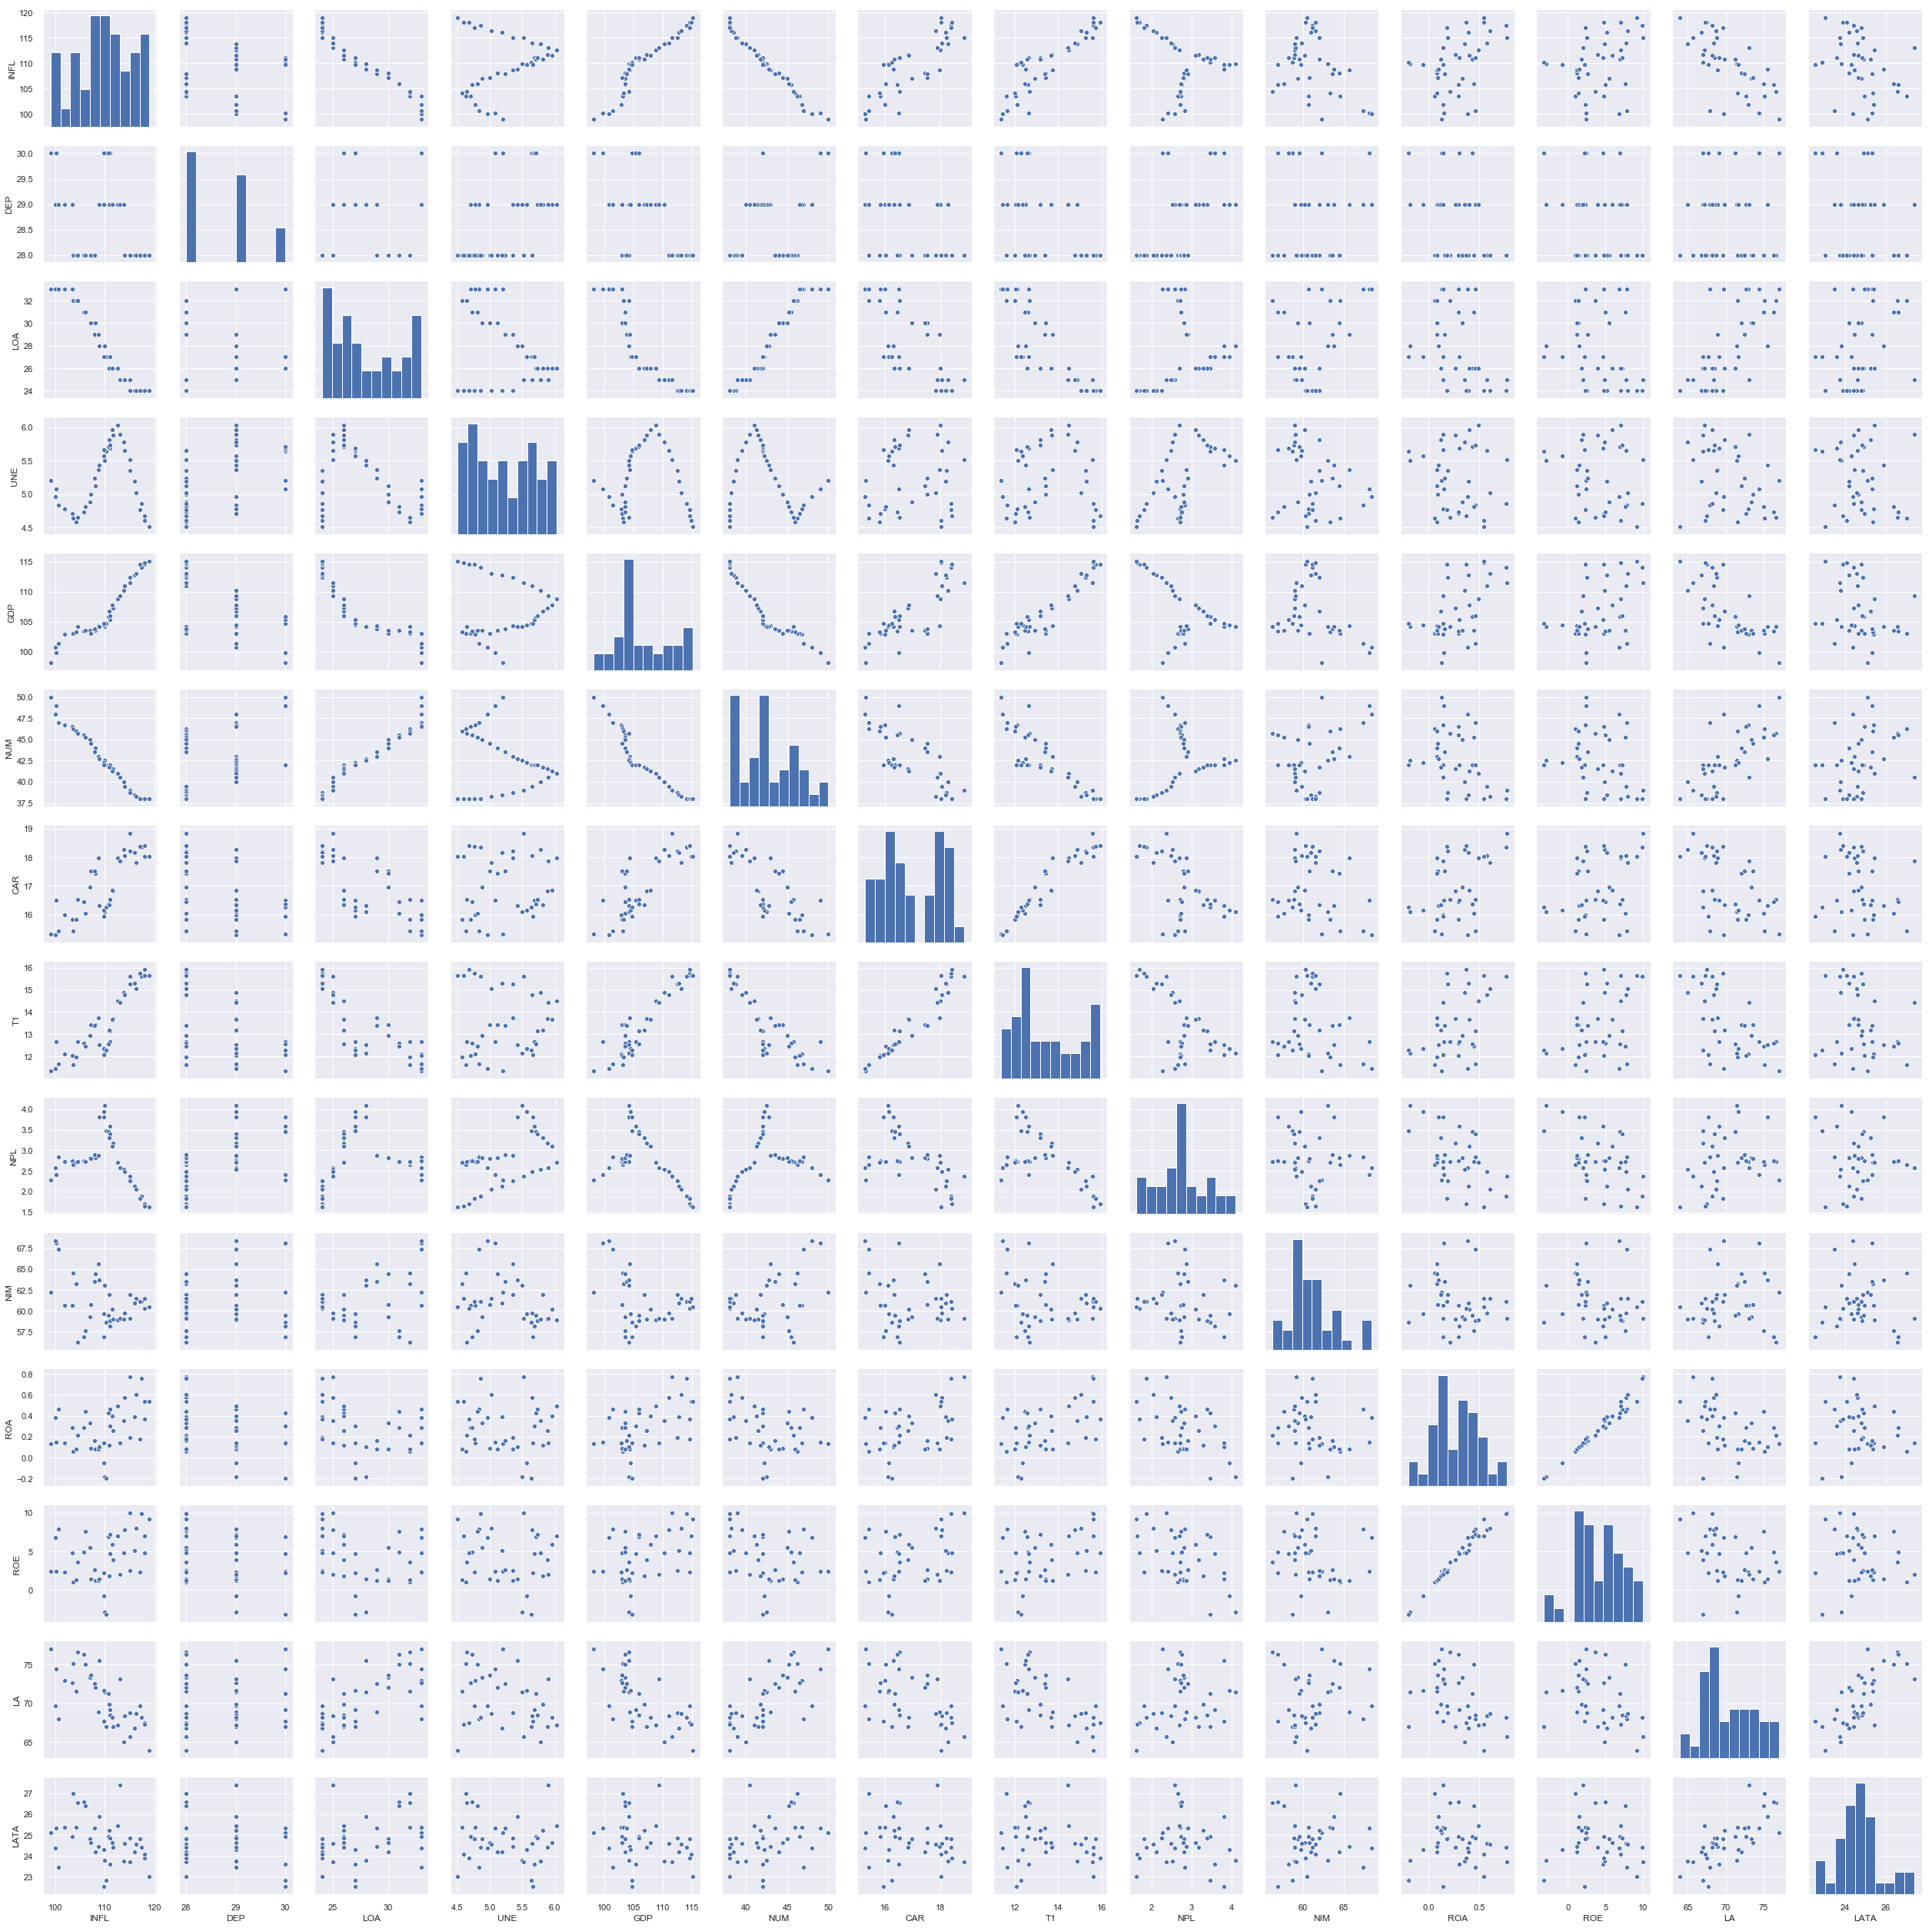

In [53]:
sns.pairplot(austria)


In [54]:
m1 = ols('NPL ~ UNE + GDP + INFL + DEP + LOA + NUM',austria).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:                    NPL   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     33.66
Date:                Thu, 11 Jun 2020   Prob (F-statistic):           1.05e-12
Time:                        12:05:38   Log-Likelihood:                 1.7516
No. Observations:                  40   AIC:                             10.50
Df Residuals:                      33   BIC:                             22.32
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.8558     14.764      4.054      0.0

In [55]:
print('Parameters: ', m1.params)
print('R2: ', m1.rsquared)

Parameters:  Intercept    59.855815
UNE           0.111247
GDP          -0.321065
INFL         -0.053126
DEP           0.092359
LOA           0.074267
NUM          -0.524522
dtype: float64
R2:  0.8595364853682188


In [62]:
m1_reg = ols('NPL ~ UNE + GDP + INFL + DEP + LOA + NUM',austria).fit_regularized(method='elastic_net', alpha=1, L1_wt=1.0)
print(m1_reg.summary())

None


In [66]:
print('Parameters: ', m1_reg.params)


Parameters:  Intercept    0.000000
UNE          0.000000
GDP          0.016392
INFL         0.002163
DEP          0.000000
LOA          0.011115
NUM          0.010612
dtype: float64


In [72]:
X= austria.drop('NPL',axis=1).values
y= austria['NPL'].values


In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=31)
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)


ValueError: could not convert string to float: '2014-09-30'

In [ ]:
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score)
print("test score: ", test_score)
print("number of features used: ", coeff_used)

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=42)

In [41]:
m2 = ols('T1 ~ UNE + GDP + INFL + DEP + LOA + NUM',austria).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:                     T1   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     55.85
Date:                Wed, 10 Jun 2020   Prob (F-statistic):           7.06e-16
Time:                        15:32:48   Log-Likelihood:                -21.997
No. Observations:                  40   AIC:                             57.99
Df Residuals:                      33   BIC:                             69.82
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0414     26.733     -2.807      0.0

In [25]:
m = ols('CAR ~ UNE + GDP + INFL + DEP + LOA + NUM',austria).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                    CAR   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     18.87
Date:                Wed, 10 Jun 2020   Prob (F-statistic):           2.17e-09
Time:                        11:10:59   Log-Likelihood:                -27.856
No. Observations:                  40   AIC:                             69.71
Df Residuals:                      33   BIC:                             81.53
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -54.5370     30.949     -1.762      0.0

In [26]:
m = ols('NIM ~ UNE + GDP + INFL + DEP + LOA + NUM',austria).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                    NIM   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     1.902
Date:                Wed, 10 Jun 2020   Prob (F-statistic):              0.110
Time:                        11:11:38   Log-Likelihood:                -93.284
No. Observations:                  40   AIC:                             200.6
Df Residuals:                      33   BIC:                             212.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    327.7801    158.864      2.063      0.0

In [27]:
m = ols('ROA ~ UNE + GDP + INFL + DEP + LOA + NUM',austria).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                    ROA   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     3.902
Date:                Wed, 10 Jun 2020   Prob (F-statistic):            0.00470
Time:                        11:12:04   Log-Likelihood:                 14.382
No. Observations:                  40   AIC:                            -14.76
Df Residuals:                      33   BIC:                            -2.942
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.6554     10.766     -1.454      0.1

In [28]:
m = ols('ROE ~ UNE + GDP + INFL + DEP + LOA + NUM',austria).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                    ROE   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     2.778
Date:                Wed, 10 Jun 2020   Prob (F-statistic):             0.0268
Time:                        11:12:17   Log-Likelihood:                -94.695
No. Observations:                  40   AIC:                             203.4
Df Residuals:                      33   BIC:                             215.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -242.0150    164.568     -1.471      0.1

In [29]:
m = ols('LA ~ UNE + GDP + INFL + DEP + LOA + NUM',austria).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                     LA   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     8.933
Date:                Wed, 10 Jun 2020   Prob (F-statistic):           8.12e-06
Time:                        11:12:28   Log-Likelihood:                -85.881
No. Observations:                  40   AIC:                             185.8
Df Residuals:                      33   BIC:                             197.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    119.1305    132.025      0.902      0.3

In [30]:
m = ols('LATA ~ UNE + GDP + INFL + DEP + LOA + NUM',austria).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                   LATA   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     3.854
Date:                Wed, 10 Jun 2020   Prob (F-statistic):            0.00506
Time:                        11:12:40   Log-Likelihood:                -48.689
No. Observations:                  40   AIC:                             111.4
Df Residuals:                      33   BIC:                             123.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1181     52.101     -0.041      0.9